In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
from PIL import Image

from scipy.ndimage import gaussian_filter

from line_image import load_image, ImageLines

MAJ_DIM = 10

IMAGE_DIR = Path('../img/').resolve()

In [2]:

def load_color_image(image_file, max_pix=1800):
    """Load filename into a numpy array, filling in transparency with 0's.

    Parameters
    ----------
    image_file : str
        File to load. Usually works with .jpg and .png.

    Returns
    -------
    numpy.ndarray of resulting image. Has shape (w, h), (w, h, 3), or (w, h, 4)
        if black and white, color, or color with alpha channel, respectively.
    """
    image = Image.open(image_file)
    size = np.array(image.size)
    if size.max() > max_pix:
        new_size = size * max_pix // size.max()
        image = image.resize(new_size)

    alpha = image.convert("RGBA").split()[-1]
    background = Image.new("RGBA", image.size, (255, 255, 255, 255))
    background.paste(image, mask=alpha)
    img = np.asarray(background)
    img = img / 255
    return img



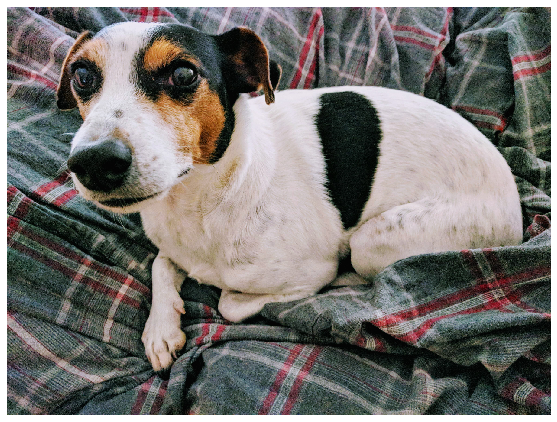

In [3]:
img = load_color_image('pete.jpg')
fig, ax = plt.subplots(figsize=(MAJ_DIM, MAJ_DIM * (img.shape[0] / img.shape[1])))

ax.imshow(img)
ax.axis('off')
fig.savefig(IMAGE_DIR / 'original_color.png')

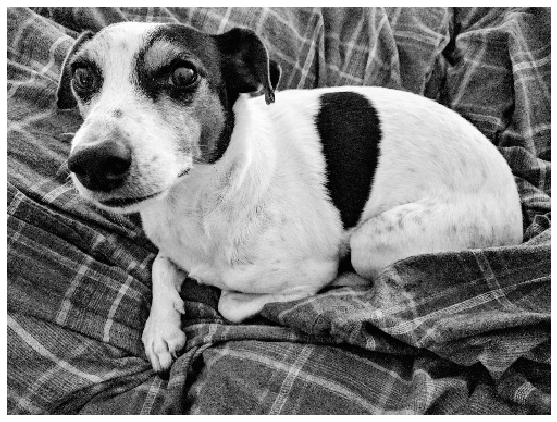

In [4]:
img = load_image('pete.jpg', max_pix=500)
fig, ax = plt.subplots(figsize=(MAJ_DIM, MAJ_DIM * (img.shape[0] / img.shape[1])))

ax.imshow(img, cmap='gray')
ax.axis('off')
fig.savefig(IMAGE_DIR / 'original.png')

{'n_lines': 25, 'sigma': 5.0, 'smooth_pts': 5, 'pixel_prop': 0.7, 'width_scale': 3.3, 'threshold': 0.24120603015075376}


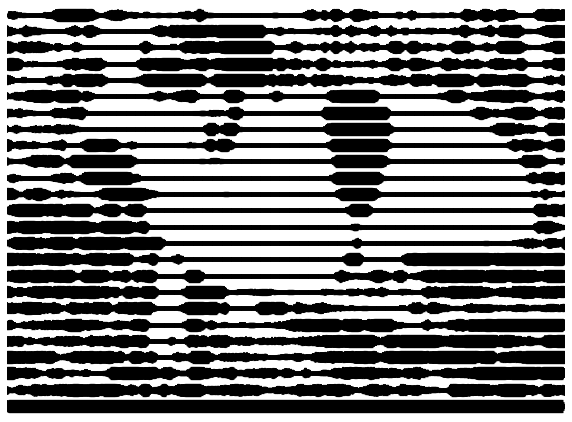

In [5]:
imlines = ImageLines(img)
fig, ax = plt.subplots(figsize=(MAJ_DIM, MAJ_DIM * (img.shape[0] / img.shape[1])))

lc, kwargs = imlines.make_line_collection(25, pixel_prop=0.7, width_scale=3.3, smooth_pts=5)

ax.add_collection(lc)
ax.set_ylim(-img.shape[0], 0)
ax.set_xlim(0, img.shape[1])
ax.axis('off')
print(kwargs)
fig.savefig(IMAGE_DIR / 'final.png')

{'n_lines': 25, 'sigma': 5.0, 'smooth_pts': 5, 'pixel_prop': 0.7, 'width_scale': 3.3, 'threshold': 0.24120603015075376}


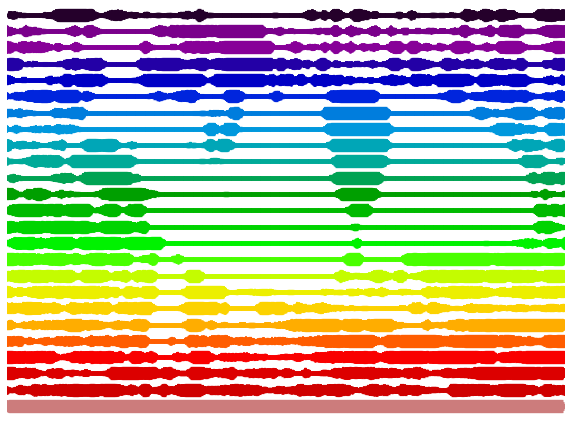

In [6]:
imlines = ImageLines(img)
fig, ax = plt.subplots(figsize=(MAJ_DIM, MAJ_DIM * (img.shape[0] / img.shape[1])))

lc, kwargs = imlines.make_line_collection(25, pixel_prop=0.7, width_scale=3.3, cmap=plt.get_cmap('nipy_spectral'))

ax.add_collection(lc)
ax.set_ylim(-img.shape[0], 0)
ax.set_xlim(0, img.shape[1])
ax.axis('off')
print(kwargs)
fig.savefig(IMAGE_DIR / 'final_color.png')

In [7]:
mask, vrows, step = imlines.make_mask(25)
smoothed_mask = imlines.make_smooth_mask(mask, 2.5)

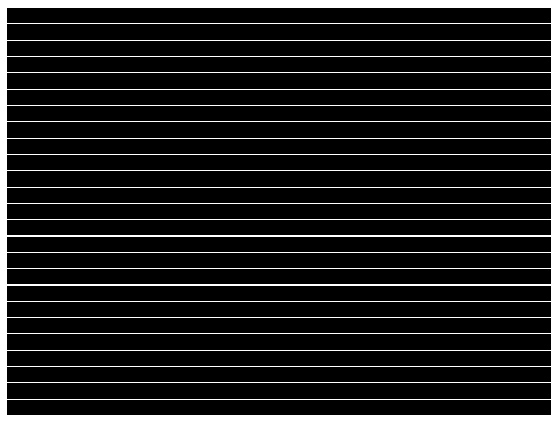

In [8]:
fig, ax = plt.subplots(figsize=(MAJ_DIM, MAJ_DIM * (img.shape[0] / img.shape[1])))
ax.imshow(mask, cmap='gray')
ax.axis('off')
fig.savefig(IMAGE_DIR / 'mask.png')

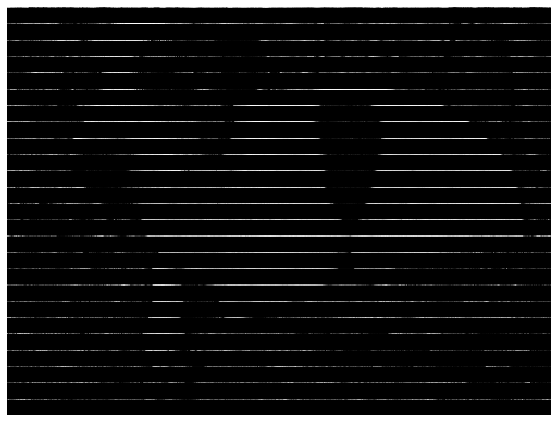

In [9]:
fig, ax = plt.subplots(figsize=(MAJ_DIM, MAJ_DIM * (img.shape[0] / img.shape[1])))

ax.imshow(mask * img, cmap='gray')
ax.axis('off')
fig.savefig(IMAGE_DIR / 'pete_mask.png')

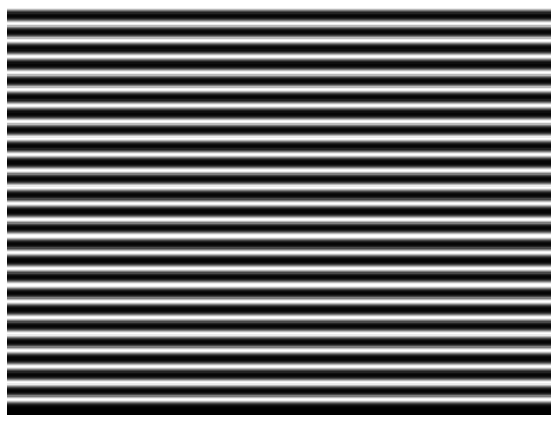

In [10]:
fig, ax = plt.subplots(figsize=(MAJ_DIM, MAJ_DIM * (img.shape[0] / img.shape[1])))

ax.imshow(smoothed_mask, cmap='gray')
ax.axis('off')
fig.savefig(IMAGE_DIR / 'smooth_mask.png')

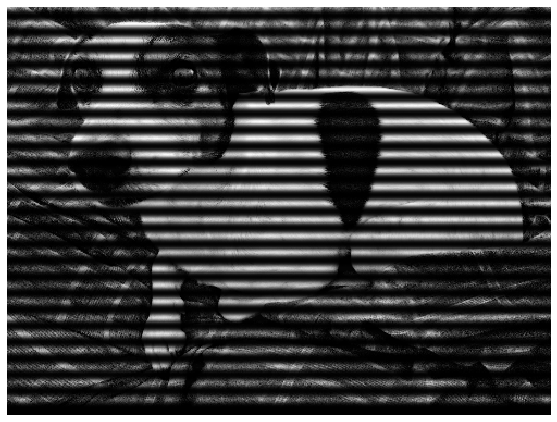

In [11]:
fig, ax = plt.subplots(figsize=(MAJ_DIM, MAJ_DIM * (img.shape[0] / img.shape[1])))

ax.imshow(smoothed_mask * img, cmap='gray')
ax.axis('off')
fig.savefig(IMAGE_DIR / 'pete_smooth.png')

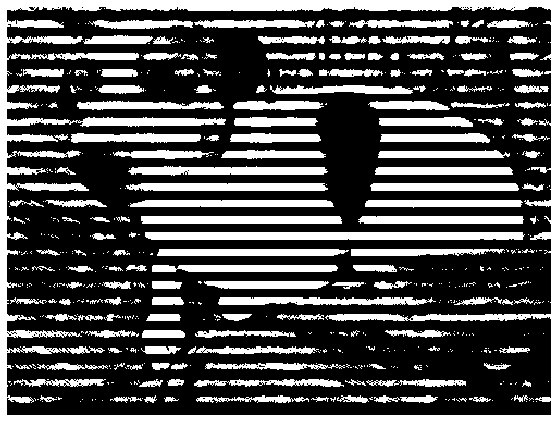

In [12]:
fig, ax = plt.subplots(figsize=(MAJ_DIM, MAJ_DIM * (img.shape[0] / img.shape[1])))

ax.imshow((smoothed_mask * img) > 0.2412, cmap='gray')
ax.axis('off')
fig.savefig(IMAGE_DIR / 'pete_thresh.png')

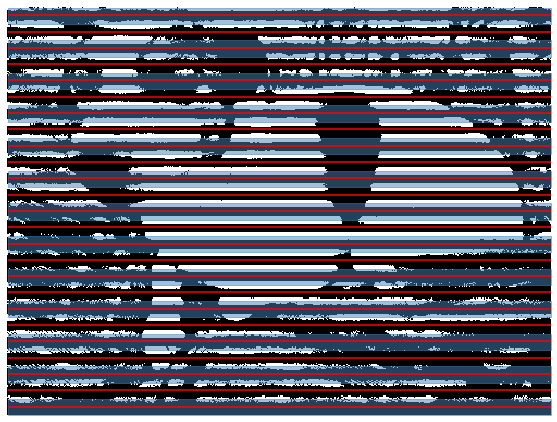

In [13]:
fig, ax = plt.subplots(figsize=(MAJ_DIM, MAJ_DIM * (img.shape[0] / img.shape[1])))

ax.imshow((smoothed_mask * img) > 0.2412, cmap='gray')
ylims = ax.get_ylim()
xlims = ax.get_xlim()
for row in np.arange(step // 2, img.shape[0], step):
    ax.hlines(y=row, xmin=0, xmax=img.shape[1], color='red')

    
for idx, row in enumerate(np.arange(0, img.shape[0], step)):

    if idx % 2 == 0:
        ax.fill_between([0, img.shape[1]], row, row + step, color='steelblue', alpha=0.5)
# for row in np.arange(0, img.shape[0], step):
#     ax.axhline(y=row, color='green', linestyle='dashed', linewidth=3)
ax.set_ylim(*ylims)
ax.set_xlim(*xlims)
ax.axis('off')
fig.savefig(IMAGE_DIR / 'pete_zones.png')

{'n_lines': 25, 'sigma': 5.0, 'smooth_pts': 1, 'pixel_prop': 0.8, 'width_scale': 1, 'threshold': 0.2914572864321608}


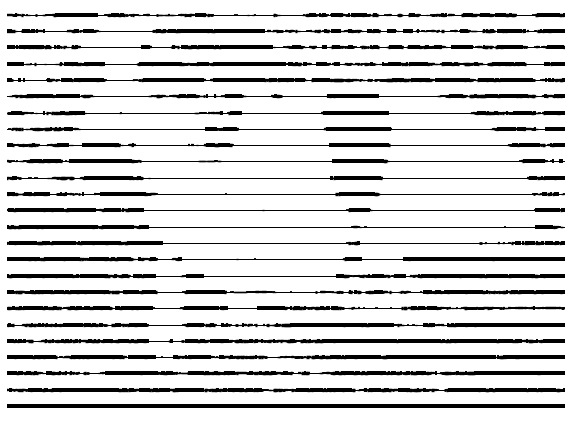

In [14]:
fig, ax = plt.subplots(figsize=(MAJ_DIM, MAJ_DIM * (img.shape[0] / img.shape[1])))

lc, kwargs = imlines.make_line_collection(25, pixel_prop=0.8, smooth_pts=1, width_scale=1)

ax.add_collection(lc)
ax.set_ylim(-img.shape[0], 0)
ax.set_xlim(0, img.shape[1])
ax.axis('off')
print(kwargs)
fig.savefig(IMAGE_DIR / 'pete_final_no_smooth.png')

{'n_lines': 25, 'sigma': 5.0, 'smooth_pts': 1, 'pixel_prop': 0.8, 'width_scale': 3.3, 'threshold': 0.2914572864321608}


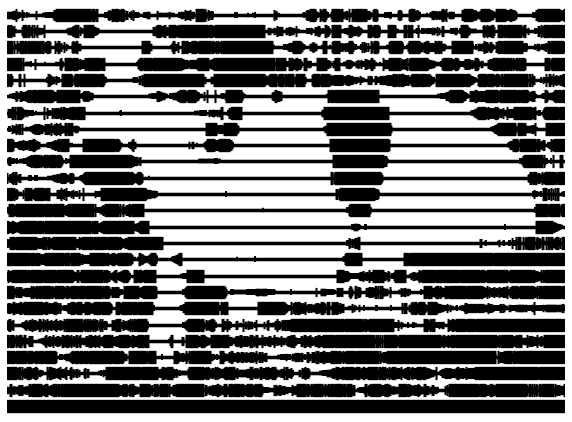

In [15]:
fig, ax = plt.subplots(figsize=(MAJ_DIM, MAJ_DIM * (img.shape[0] / img.shape[1])))

lc, kwargs = imlines.make_line_collection(25, pixel_prop=0.8, smooth_pts=1, width_scale=3.3)

ax.add_collection(lc)
ax.set_ylim(-img.shape[0], 0)
ax.set_xlim(0, img.shape[1])
ax.axis('off')
print(kwargs)
fig.savefig(IMAGE_DIR / 'pete_final_wide.png')

In [16]:
plt.rcParams.update({
    'figure.figsize': [16.0, 5.0],
})

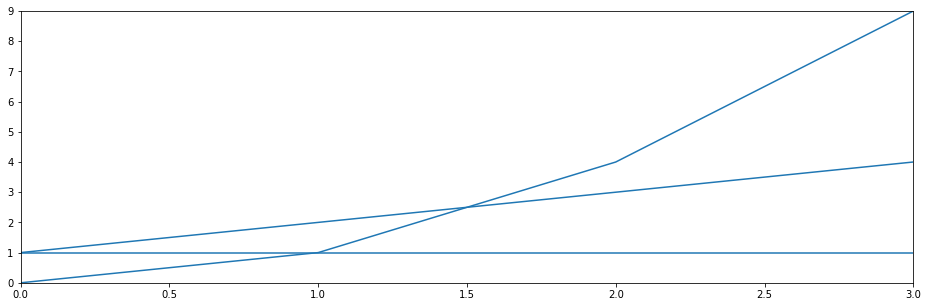

In [17]:
fig, ax = plt.subplots()

lc = LineCollection(
    segments=[
        ((0, 1), (1, 1), (2, 1), (3, 1)),
        ((0, 1), (1, 2), (2, 3), (3, 4)),
        ((0, 0), (1, 1), (2, 4), (3, 9)),
    ],
)

ax.add_collection(lc)
ax.set_ylim(0, 9)
ax.set_xlim(0, 3)

fig.savefig(IMAGE_DIR / 'lc1.png')

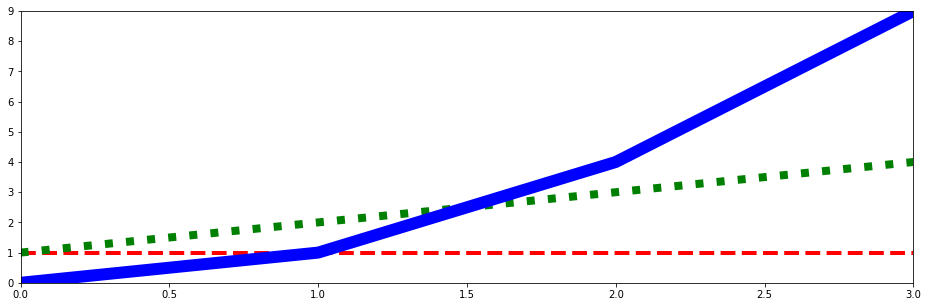

In [18]:

fig, ax = plt.subplots()
lc = LineCollection(
    segments=[
        ((0, 1), (1, 1), (2, 1), (3, 1)),
        ((0, 1), (1, 2), (2, 3), (3, 4)),
        ((0, 0), (1, 1), (2, 4), (3, 9)),
    ],
    colors=('red', 'green', 'blue'),
    linewidths=(4, 8, 12),
    linestyles=('dashed', 'dotted', 'solid')
)

ax.add_collection(lc)
ax.set_ylim(0, 9)
ax.set_xlim(0, 3);
fig.savefig(IMAGE_DIR / 'lc2.png')

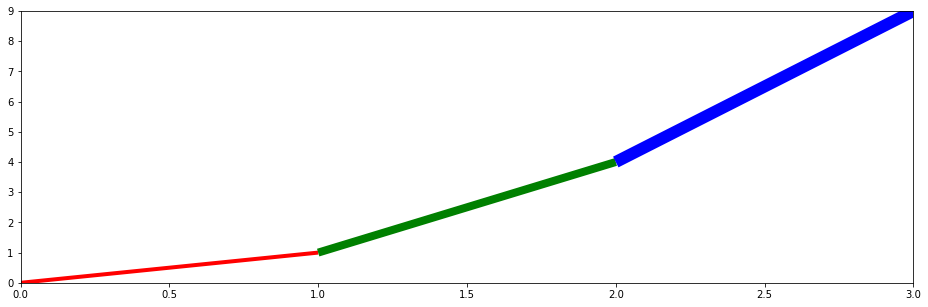

In [19]:

fig, ax = plt.subplots()

lc = LineCollection(
    segments=[
        ((0, 0), (1, 1)), 
        ((1, 1), (2, 4)),
        ((2, 4), (3, 9))
    ],
    colors=('red', 'green', 'blue'),
    linewidths=(4, 8, 12),
)

ax.add_collection(lc)
ax.set_ylim(0, 9)
ax.set_xlim(0, 3);
fig.savefig(IMAGE_DIR / 'lc3.png')

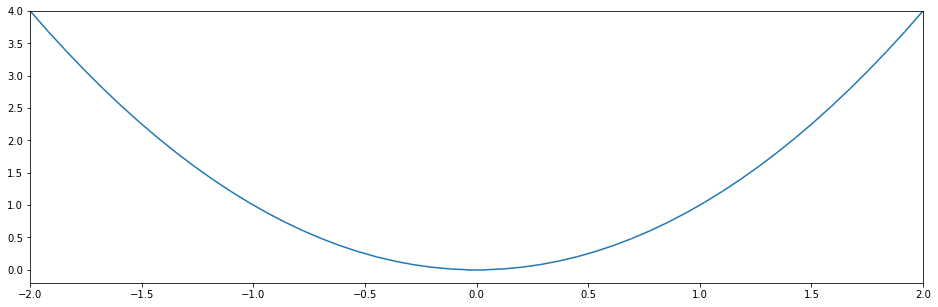

In [20]:
import scipy.stats

x = np.linspace(-2, 2)
y = x ** 2

points = np.vstack((x, y)).T
segments = list(zip(points[:-1], points[1:]))


fig, ax = plt.subplots()

lc = LineCollection(
    segments=segments,
)

ax.add_collection(lc)
ax.set_ylim(-0.2, 4)
ax.set_xlim(-2, 2);
fig.savefig(IMAGE_DIR / 'lc4.png')

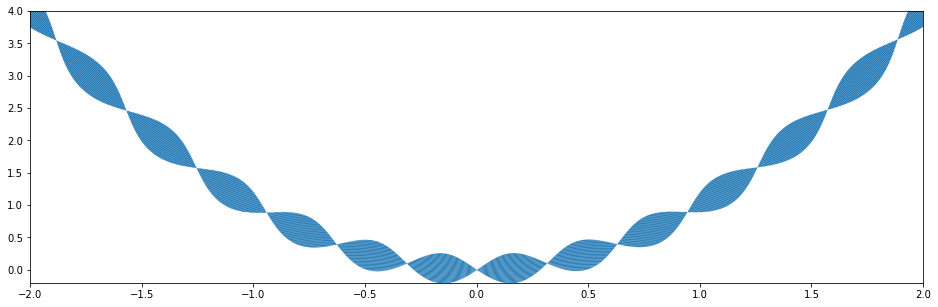

In [21]:
import scipy.stats

x = np.linspace(-2, 2, 1000)
y = x ** 2

points = np.vstack((x, y)).T
segments = list(zip(points[:-1], points[1:]))
linewidths = 30 * np.abs(np.sin(10 * x))


fig, ax = plt.subplots()

lc = LineCollection(
    segments=segments,
    linewidths=linewidths,
)

ax.add_collection(lc)
ax.set_ylim(-0.2, 4)
ax.set_xlim(-2, 2);
fig.savefig(IMAGE_DIR / 'lc5.png')

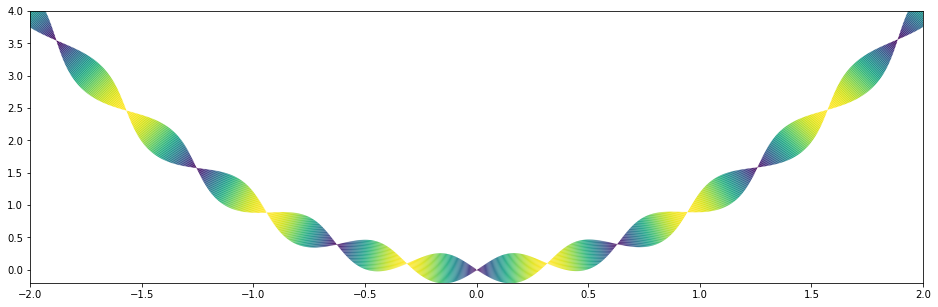

In [22]:
import scipy.stats

x = np.linspace(-2, 2, 1000)
y = x ** 2

points = np.vstack((x, y)).T
segments = list(zip(points[:-1], points[1:]))
linewidths = 30 * np.abs(np.sin(10 * x))


fig, ax = plt.subplots()

lc = LineCollection(
    segments=segments,
    linewidths=linewidths,
    colors=plt.get_cmap('viridis')(np.abs(np.sin(5 * x)))
)

ax.add_collection(lc)
ax.set_ylim(-0.2, 4)
ax.set_xlim(-2, 2);
fig.savefig(IMAGE_DIR / 'lc6.png')

In [23]:
def plot_line(x, y, linewidths=None, colors=None, ax=None):
    points = np.vstack((x, y)).T
    segments = list(zip(points[:-1], points[1:]))
    if ax is None:
        ax = plt.gca()

    lc = LineCollection(
        segments=segments,
        linewidths=linewidths,
        colors=colors,
    )
    ax.add_collection(lc)
    def make_data_lim(data):
        lo, hi = data.min(), data.max()
        mid = (lo + hi) / 2
        scale = 1.1 * (hi - lo) / 2
        return mid - scale, mid + scale
    ax.set(ylim=make_data_lim(y),
           xlim=make_data_lim(x))
    return lc


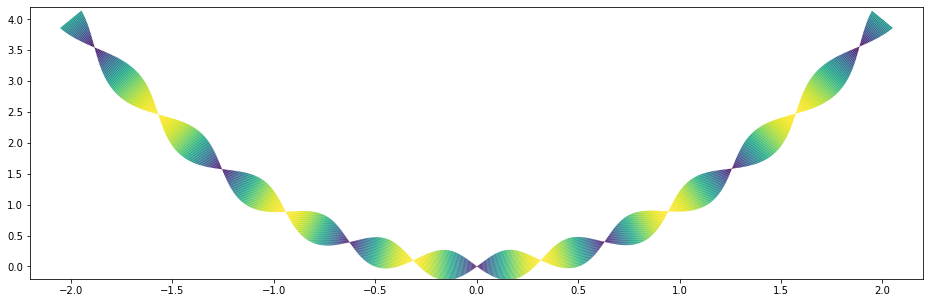

In [24]:
x = np.linspace(-2, 2, 1000)
y = x ** 2
linewidths = 30 * np.abs(np.sin(10 * x))
colors = plt.get_cmap('viridis')(np.abs(np.sin(5 * x)))

fig, ax = plt.subplots()
plot_line(x, y,
         linewidths=linewidths,
         colors=colors,
         ax=ax)

fig.savefig(IMAGE_DIR / 'lc7.png')

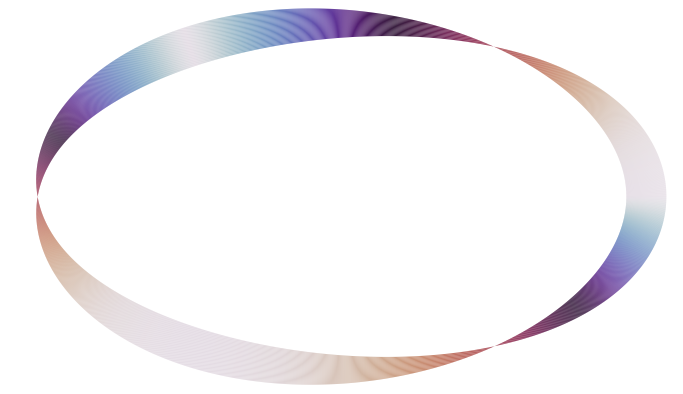

In [27]:
t = np.linspace(0, np.pi * 2.0, 2_000)

fig, ax = plt.subplots(figsize=(12, 7))

# colors make the mobius band look 2 sided
cmap = plt.get_cmap('twilight')
colors = cmap(np.abs(np.cos(t * 0.75)))

plot_line(np.cos(t), np.sin(t), # circle
          linewidths=40 * np.cos(1.5 * t), # 3 turns
          colors=colors,
          ax=ax)
ax.axis('off')
fig.savefig(IMAGE_DIR / 'lc8.png')